<a href="https://colab.research.google.com/github/Mayankk88/Brain-computer-interface/blob/main/BCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading MNSIT datasets

In [4]:
import torch
from torchvision import datasets, transforms
import numpy as np

In [5]:
#definr a transform to the image tensor
transforms= transforms.Compose([transforms.ToTensor()])


In [6]:
from torchvision import datasets, transforms

# Define a transform (if you haven't already)
transform = transforms.ToTensor()

# Download the MNIST training dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download the MNIST test dataset
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:00<00:00, 36.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.51MB/s]


In [18]:
image = mnist_train[0]

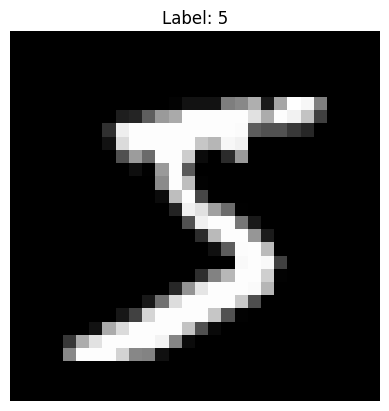

In [9]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define transform and load dataset
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Get an image and its label
image, label = mnist[0]

# Convert the tensor image to a 2D numpy array for imshow
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()


# DATA Processing

In [12]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False)

In [13]:
for images, labels in train_loader:
    print(f"Batch of images.shape: {images.shape}")
    print(f"Batch of labels.shape: {labels.shape}")
    break # remove this line to iterate through entire Dataloader

Batch of images.shape: torch.Size([64, 1, 28, 28])
Batch of labels.shape: torch.Size([64])


# Building simlpe Neural Network

In [14]:
import torch.nn as nn

In [15]:
import torch.nn as nn

# define the MLP model
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)#input layer to first hidden layer
    self.relu = nn.ReLU()           # Define ReLU as a layer
    self.fc2 = nn.Linear(128, 64)   #first hidden layer to second hidden layer
    self.fc3 = nn.Linear(64, 10)    #second hidden layer to output layer

  def forward(self, x):
    x = x.view(-1, 28*28)           #flatten the image
    x = self.relu(self.fc1(x))      #apply ReLU activation using the defined layer
    x = self.relu(self.fc2(x))      #apply ReLU activation using the defined layer
    x = self.fc3(x)                 #output layer
    return x

In [16]:
Neural_Network =  NN()

In [17]:
Neural_Network

NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

# Training your Network

In [15]:
import torch.optim as optim
learning_rate=0.02
criterion =nn.CrossEntropyLoss()
optimizer = optim.Adam(Neural_Network.parameters(), lr=learning_rate)
epochs = 10
#Training loop
for epoch in range(epochs):
    Neural_Network.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = Neural_Network(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch{epoch}')

Epoch0
Epoch1
Epoch2
Epoch3
Epoch4
Epoch5
Epoch6
Epoch7
Epoch8
Epoch9


In [20]:
from sklearn.metrics import confusion_matrix
import torch

Neural_Network.eval()  # Set the model to evaluation mode
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = Neural_Network(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 388    7    0    0    0  419    0  166    0    0]
 [1037    0    0    0    0   31    0   67    0    0]
 [ 440    1    0    0    0  170    1  419    1    0]
 [ 432    0    0    0    1  203    0  374    0    0]
 [ 297    2    0    0    0  269    0  414    0    0]
 [ 347    1    0    0    0  367    0  177    0    0]
 [ 342    1    0    0    0  241    0  374    0    0]
 [ 254    4    0    0    0  125    0  645    0    0]
 [ 382    1    0    0    0  246    0  344    1    0]
 [ 209    0    0    0    0  225    1  574    0    0]]
